## Project 3: Web API's and NLP

## Model and Predictions

### Contents:

- [Model Comparison and Summary](#summary)
- [Baseline Model](#baseline)
- [1. CountVectorizer / Naive Bayes](#cv/nb)
- [2. Lemmatizer / Naive Bayes](#lem/nb)
- [3. Logistic Regression](#lr)
- [4. Random Forest](#forest)
- [5. KNeighbors Classifier](#knn)
- [6. SVC](#svc)

In [31]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import plot_confusion_matrix

In [6]:
# read the csv file
df = pd.read_csv('data/clean_combined.csv')

In [38]:
df['subreddit'].replace({'chess': 1, 'poker': 0}, inplace = True)

<a class="anchor" id="summary"></a>

### Model Comparison and Summary

| Model | Accuracy | F1 Score | Recall|
|-------|----------|----------|-------|
| Lemmatizer / Naive Bayes | 0.93 | 0.92 | 0.94 |
| CountVectorizer / StandardScaler / SVC | 0.9 | 0.89 | 0.87 |
| CountVectorizer / Naive Bayes | 0.83 | 0.79 | 0.69 |
| CountVectorizer / StandardScaler / Logistic Regression | 0.82 | 0.78 | 0.66 |
| CountVectorizer / StandardScaler / KNeighbors Classifier | 0.78 | 0.77 | 0.73 |
| CountVectorizer / Random Forest | 0.77 | 0.70 | 0.55 |


<a class="anchor" id="baseline"></a>

## Null Model / Baseline

In [39]:
# value composition in the target column
df['subreddit'].value_counts(normalize = True)

0    0.519231
1    0.480769
Name: subreddit, dtype: float64

#### Train Test Split

In [40]:
# define X and y
X = df['title']
y = df['subreddit']

In [41]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

<a class="anchor" id="cv/nb"></a>

## 1. Naive Bayes

In [42]:
# instantiate a pipe
pipe_nb = make_pipeline(CountVectorizer(stop_words = 'english', ngram_range = (2,2)), MultinomialNB())

In [43]:
# fit the data
pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(2, 2), stop_words='english')),
                ('multinomialnb', MultinomialNB())])

#### Accuracy score on the train and the test data

In [44]:
# score on the train data
pipe_nb.score(X_train, y_train)

0.9774358974358974

In [45]:
# score on the test data
pipe_nb.score(X_test, y_test)

0.8257692307692308

#### F1 score on the train and the test data

In [86]:
# f1 score on the train data
f1_score(y_train, pipe_nb.predict(X_train))

0.9759890859481583

In [87]:
# f1 score on the test data
f1_score(y_test, pipe_nb.predict(X_test))

0.7938097405553027

#### Recall score on the train and the test data

In [88]:
# recall score on the train data
recall_score(y_train, pipe_nb.predict(X_train))

0.9561614541566426

In [89]:
# recall score on the test data
recall_score(y_test, pipe_nb.predict(X_test))

0.6926131850675139

<a class="anchor" id="lem/nb"></a>

## 2. Naive Bayes with lemmatizing

In [119]:
# define a function that return a lowercase lemmatized list of words
def split_lemmatize(text):
    text_lower = text.lower()
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(x) for x in text_lower.split()])

In [120]:
# make a pipe with lemmatizer function
pipe_lem = make_pipeline(CountVectorizer(preprocessor = split_lemmatize, ngram_range = (2,2)), MultinomialNB())

In [49]:
# fit the data
pipe_lem.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(2, 2),
                                 preprocessor=<function split_lemmatize at 0x00000216D09BC1F0>)),
                ('multinomialnb', MultinomialNB())])

In [50]:
# score on the train data
pipe_lem.score(X_train, y_train)

0.9862820512820513

In [51]:
# score on the test data
pipe_lem.score(X_test, y_test)

0.8661538461538462

In [121]:
params_lem = {
            'countvectorizer__max_features': [100, 500, 1000, 10_000,],
            'countvectorizer__ngram_range': [(1,1), (2,2), (3,3)],
            'countvectorizer__stop_words': ['english', None],
            'multinomialnb__alpha': [0.01, 0.1, 1, 5, 10]
}

In [122]:
# start a gridsearch
grid_lem = GridSearchCV(pipe_lem, param_grid = params_lem, n_jobs = -1)

In [123]:
# fit the data
grid_lem.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(ngram_range=(2, 2),
                                                        preprocessor=<function split_lemmatize at 0x00000216D456F280>)),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [100, 500, 1000,
                                                           10000],
                         'countvectorizer__ngram_range': [(1, 1), (2, 2),
                                                          (3, 3)],
                         'countvectorizer__stop_words': ['english', None],
                         'multinomialnb__alpha': [0.01, 0.1, 1, 5, 10]})

#### Accuracy score on the train and the test data

In [124]:
# score on the train data
grid_lem.score(X_train, y_train)

0.9624358974358974

In [125]:
# accuracy score on the test data
grid_lem.score(X_test, y_test)

0.9253846153846154

#### F1 score on the train and the test data

In [126]:
# f1 score on the train data
f1_score(y_train, grid_lem.predict(X_train))

0.9611663353214048

In [127]:
f1_score(y_test, grid_lem.predict(X_test))

0.92421875

#### Recall score on the train and the test data

In [128]:
recall_score(y_train, grid_lem.predict(X_train))

0.9692595562683775

In [129]:
recall_score(y_test, grid_lem.predict(X_test))

0.9396346306592533

In [130]:
# see what were the best parameters
grid_lem.best_params_

{'countvectorizer__max_features': 10000,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__stop_words': None,
 'multinomialnb__alpha': 1}

In [131]:
# explore the dataframe of grid results
pd.DataFrame(grid_lem.cv_results_).sort_values(by = 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__max_features,param_countvectorizer__ngram_range,param_countvectorizer__stop_words,param_multinomialnb__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,1.185946,0.041912,0.267652,0.040514,100,"(3, 3)",english,10,"{'countvectorizer__max_features': 100, 'countv...",0.542949,0.534615,0.544872,0.537821,0.542949,0.540641,0.003816,120
20,1.240702,0.039204,0.303857,0.021246,100,"(3, 3)",english,0.01,"{'countvectorizer__max_features': 100, 'countv...",0.542949,0.534615,0.544872,0.537821,0.543590,0.540769,0.003901,116
23,1.209662,0.073081,0.278436,0.018902,100,"(3, 3)",english,5,"{'countvectorizer__max_features': 100, 'countv...",0.542949,0.534615,0.544872,0.537821,0.543590,0.540769,0.003901,116
22,1.228408,0.048342,0.264648,0.014892,100,"(3, 3)",english,1,"{'countvectorizer__max_features': 100, 'countv...",0.542949,0.534615,0.544872,0.537821,0.543590,0.540769,0.003901,116
21,1.241599,0.027012,0.275663,0.010064,100,"(3, 3)",english,0.10,"{'countvectorizer__max_features': 100, 'countv...",0.542949,0.534615,0.544872,0.537821,0.543590,0.540769,0.003901,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.784048,0.184085,0.957294,0.076628,10000,"(1, 1)",None,0.01,"{'countvectorizer__max_features': 10000, 'coun...",0.923077,0.930769,0.927564,0.925641,0.933333,0.928077,0.003635,5
91,2.343962,0.105065,0.617520,0.059442,10000,"(1, 1)",english,0.10,"{'countvectorizer__max_features': 10000, 'coun...",0.920513,0.933974,0.932051,0.926282,0.933974,0.929359,0.005245,4
92,2.607534,0.409710,0.786538,0.183913,10000,"(1, 1)",english,1,"{'countvectorizer__max_features': 10000, 'coun...",0.923077,0.933333,0.937179,0.926923,0.935256,0.931154,0.005311,3
96,3.706997,0.285641,0.658839,0.247925,10000,"(1, 1)",None,0.10,"{'countvectorizer__max_features': 10000, 'coun...",0.927564,0.935256,0.931410,0.932051,0.937821,0.932821,0.003497,2


In [132]:
# get feature names
features = grid_lem.best_estimator_.named_steps.countvectorizer.get_feature_names()

In [133]:
# coefficients
coefs = grid_lem.best_estimator_.named_steps['multinomialnb'].coef_

c:\users\anel akiyanova\anaconda3\envs\new\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [142]:
coefs_df = pd.DataFrame({'coefs': coefs[0], 'names': features}).sort_values(by = 'coefs', ascending = False).head(30)

In [143]:
coefs_df

,coefs,names
6585,-3.540704,to
6493,-3.668170,the
1521,-3.789504,chess
3362,-3.942871,in
707,-4.160268,and
6517,-4.190741,this
4261,-4.241220,move
3503,-4.348885,is
4291,-4.384094,my
2859,-4.465844,game


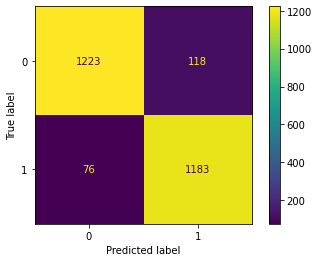

In [66]:
# plot confusion matrix 
plot_confusion_matrix(grid_lem, X_test, y_test);

<a class="anchor" id="lr"></a>

## 3. Logistic Regession

In [67]:
# instantiate a pipe
pipe_lr = make_pipeline(CountVectorizer(stop_words = 'english', ngram_range = (2,2)), StandardScaler(with_mean = False), LogisticRegression())

In [68]:
# fit the data
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(2, 2), stop_words='english')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])

#### Accuracy score on the train and the test data

In [69]:
# score on the trian data
pipe_lr.score(X_train, y_train)

0.9793589743589743

In [70]:
# score on the test data
pipe_lr.score(X_test, y_test)

0.816923076923077

#### F1 score on the train and the test data

In [76]:
# f1 score on the train data
f1_score(y_train, pipe_lr.predict(X_train))

0.9780144749419636

In [77]:
# f1 score on the test data
f1_score(y_test, pipe_lr.predict(X_test))

0.7783985102420857

#### Recall score on the train and the test data

In [78]:
# recall score on the train data
recall_score(y_train, pipe_lr.predict(X_train))

0.9572306869820904

In [80]:
# recall score on the test data
recall_score(y_test, pipe_lr.predict(X_test))

0.6640190627482129

<a class="anchor" id="forest"></a>

## 4. Random Forest Classifier

In [71]:
# instantiate a pipe
pipe_forest = make_pipeline(CountVectorizer(stop_words = 'english', ngram_range = (2,2)), RandomForestClassifier())

In [72]:
# fit the data
pipe_forest.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(2, 2), stop_words='english')),
                ('randomforestclassifier', RandomForestClassifier())])

#### Accuracy score on the train and the test data

In [73]:
# score on the train data
pipe_forest.score(X_train, y_train)

0.9793589743589743

In [74]:
# score on the test data
pipe_forest.score(X_test, y_test)

0.7742307692307693

#### F1 score on the train and the test data

In [81]:
# f1 score on the train data
f1_score(y_train, pipe_forest.predict(X_train))

0.9780084687884169

In [82]:
# f1 score on the test data
f1_score(y_test, pipe_forest.predict(X_test))

0.7036850075719333

#### Recall score on the train and the test data

In [83]:
# recall score on the train data
recall_score(y_train, pipe_forest.predict(X_train))

0.9569633787757285

In [84]:
# recall score on the test data
recall_score(y_test, pipe_forest.predict(X_test))

0.5536139793486894

<a class="anchor" id="knn"></a>

## 5. KNeighbors Classifier

In [94]:
# start a pipe
pipe_knn = make_pipeline(CountVectorizer(stop_words = 'english', ngram_range = (1,1)), StandardScaler(with_mean = False), KNeighborsClassifier())

In [95]:
# fit the train data
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### Accuracy score on the train and the test data

In [96]:
# score on the train data
pipe_knn.score(X_train, y_train)

0.8703846153846154

In [97]:
# score on the test data
pipe_knn.score(X_test, y_test)

0.7834615384615384

#### F1 score on the train and the test data

In [98]:
# f1 score on the train data
f1_score(y_train, pipe_knn.predict(X_train))

0.8620171966698512

In [99]:
# f1 score on the test data
f1_score(y_test, pipe_knn.predict(X_test))

0.7666804807293826

#### Recall score on the train and the test data

In [100]:
# recall score on the train data
recall_score(y_train, pipe_knn.predict(X_train))

0.8441593156909917

In [101]:
# recall score on the test data
recall_score(y_test, pipe_knn.predict(X_test))

0.7347100873709294

<a class="anchor" id="svc"></a>

## 6. SVC

In [102]:
# make a pipe
pipe_svc = make_pipeline(CountVectorizer(ngram_range = (1,1)), StandardScaler(with_mean = False), SVC())

In [55]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC())])

In [103]:
params_svc = {
        'countvectorizer__max_features': [50, 100, 500, 1000, 10_000], 
        'countvectorizer__ngram_range': [(1,1), (2,2), (3,3)],
        'countvectorizer__stop_words': ['english', None],
        'svc__gamma': ['scale', 'auto'],
        'svc__C': [0.01, 0.1, 1, 3, 5, 10]
}

In [104]:
grid_svc = GridSearchCV(pipe_svc, param_grid = params_svc, n_jobs = -1)

In [105]:
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [50, 100, 500, 1000,
                                                           10000],
                         'countvectorizer__ngram_range': [(1, 1), (2, 2),
                                                          (3, 3)],
                         'countvectorizer__stop_words': ['english', None],
                         'svc__C': [0.01, 0.1, 1, 3, 5, 10],
                         'svc__gamma': ['scale', 'auto']})

#### Accuracy score on the train and the test data

In [106]:
# score on the train data
grid_svc.score(X_train, y_train)

0.955

In [107]:
# score on the test data
grid_svc.score(X_test, y_test)

0.9011538461538462

#### F1 score on the train and the test data

In [108]:
# f1 score on the train data
f1_score(y_train, grid_svc.predict(X_train))

0.9516462322633971

In [109]:
# f1 score on the test data
f1_score(y_test, grid_svc.predict(X_test))

0.8948875255623722

#### Recall score on the train and the test data

In [110]:
# recall score on the train data
recall_score(y_train, grid_svc.predict(X_train))

0.9232825447741245

In [111]:
# recall score on the test data
recall_score(y_test, grid_svc.predict(X_test))

0.868943606036537

In [112]:
grid_svc.best_params_

{'countvectorizer__max_features': 1000,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__stop_words': None,
 'svc__C': 1,
 'svc__gamma': 'scale'}

In [113]:
# explore the dataframe of grid results
pd.DataFrame(grid_svc.cv_results_).sort_values(by = 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__max_features,param_countvectorizer__ngram_range,param_countvectorizer__stop_words,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
312,4.859312,0.351982,0.814568,0.070557,10000,"(2, 2)",english,0.01,scale,"{'countvectorizer__max_features': 10000, 'coun...",0.519872,0.520513,0.520513,0.520513,0.520513,0.520385,0.000256,331
121,1.857742,0.129081,0.318149,0.067754,100,"(3, 3)",english,0.01,auto,"{'countvectorizer__max_features': 100, 'countv...",0.519872,0.520513,0.520513,0.520513,0.520513,0.520385,0.000256,331
120,1.837389,0.164043,0.297223,0.030631,100,"(3, 3)",english,0.01,scale,"{'countvectorizer__max_features': 100, 'countv...",0.519872,0.520513,0.520513,0.520513,0.520513,0.520385,0.000256,331
265,2.289320,0.154707,0.360154,0.040607,1000,"(3, 3)",english,0.01,auto,"{'countvectorizer__max_features': 1000, 'count...",0.519872,0.520513,0.520513,0.520513,0.520513,0.520385,0.000256,331
264,2.269944,0.173720,0.371207,0.029623,1000,"(3, 3)",english,0.01,scale,"{'countvectorizer__max_features': 1000, 'count...",0.519872,0.520513,0.520513,0.520513,0.520513,0.520385,0.000256,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,4.522457,0.448436,0.713691,0.059966,1000,"(1, 1)",english,3,scale,"{'countvectorizer__max_features': 1000, 'count...",0.892949,0.894872,0.895513,0.898718,0.897436,0.895897,0.002011,5
235,6.126702,0.070589,1.240065,0.090515,1000,"(1, 1)",None,3,auto,"{'countvectorizer__max_features': 1000, 'count...",0.887821,0.901282,0.896154,0.894231,0.901923,0.896282,0.005151,4
234,5.970942,0.206509,1.127038,0.065313,1000,"(1, 1)",None,3,scale,"{'countvectorizer__max_features': 1000, 'count...",0.887821,0.901282,0.896795,0.894231,0.901923,0.896410,0.005154,3
233,6.765169,0.092520,1.243504,0.025878,1000,"(1, 1)",None,1,auto,"{'countvectorizer__max_features': 1000, 'count...",0.894231,0.901282,0.901282,0.898077,0.909615,0.900897,0.005073,2


In [114]:
# get feature names
features = grid_svc.best_estimator_.named_steps.countvectorizer.get_feature_names()

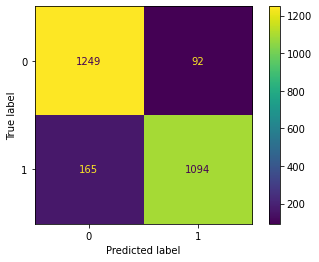

In [115]:
# plot confusion matrix 
plot_confusion_matrix(grid_svc, X_test, y_test);